In [1]:
import numpy as np
import cv2
import sys

import matplotlib.pyplot as plt

In [2]:
img  = cv2.imread('./Ch_1_Opencv_Intro/fig/cat.bmp')

if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image', img)

while True:
    key = cv2.waitKey()
    if key == 27:
        break
        
cv2.destroyAllWindows()

In [3]:
##
import os

In [6]:
img_lists = os.listdir('./Ch_1_Opencv_Intro/fig/my_images/')
# print(img_lists)

img_path = []
for i in img_lists:
    img_name = './Ch_1_Opencv_Intro/fig/my_images/' + i
    img_path.append(img_name)
    
# print(img_path)
cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN,
                     cv2.WINDOW_FULLSCREEN)

idx = 0
while True:
    img = cv2.imread(img_path[idx])
    
    if img is None:
        print('image read failed')
        break
    
    cv2.imshow('scene', img)
    
    if cv2.waitKey(3000) == 27:
        break
        
    idx += 1
    if idx >= len(img_path):
        idx = 0
        
cv2.destroyAllWindows()

In [8]:
src = cv2.imread('./Ch_2_Opencv_basic/fig/airplane.bmp')
mask = cv2.imread('./Ch_2_Opencv_basic/fig/mask_plane.bmp')
dst = cv2.imread('./Ch_2_Opencv_basic/fig/field.bmp')

cv2.copyTo(src, mask, dst)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
##
img = np.full((600, 1200, 3), 255, np.uint8)

cv2.line(img, (50, 50), (200, 50), (0, 0, 255), 3)
cv2.arrowedLine(img, (200, 50), (200, 200), (255, 0, 255), 3)
cv2.rectangle(img, (50, 300), (100, 400), (255, 0, 0), -1)
cv2.rectangle(img, (50, 300, 100, 400), (0, 0, 255), 4)
cv2.circle(img, (500, 300), 100, (0, 255, 255), 3, cv2.LINE_AA)
cv2.putText(img, 'Opencv', (500, 300), cv2.FONT_HERSHEY_COMPLEX,
           1, (0, 255, 0), 2, cv2.LINE_AA)

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame open failed')
        break
    
    out.write(frame)
    cv2.imshow('image', frame)
    
    if cv2.waitKey(30) == 27:
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

In [17]:
def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255), 3, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x, y
        

img = np.ones((500, 600, 3), np.uint8)*255

cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse, img)

cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
def call_track(pos):
    img[:] = img1*(pos/255)
    cv2.imshow('image', img)

img = cv2.imread('./Ch_2_Opencv_basic/fig/airplane.bmp', 0)
img1 = img.copy()

cv2.imshow('image', img)
cv2.createTrackbar('level', 'image', 0, 255, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

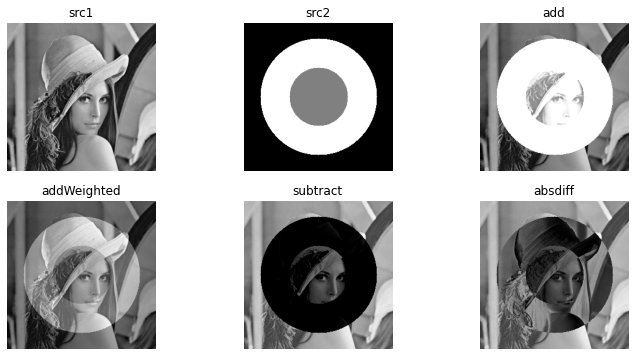

In [22]:
src1 = cv2.imread('./Ch_3_Basic_img_proc/fig/lenna256.bmp', 0)
src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 100, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.7, src2, 0.3, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

plt.figure(figsize = (12, 6))
plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('add')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('addWeighted')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('subtract')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('absdiff')
plt.show()

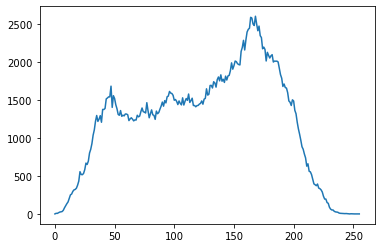

In [24]:
src = cv2.imread('./flowers.jpg', 1)

# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) 
hist_b = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 256])


cv2.imshow('src', src)

plt.plot(hist)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
src = cv2.imread('./Ch_4_Histogram_modi/fig/manjang.jpg', 0)
# normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
src_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
src_equal = cv2.equalizeHist(src)


cv2.imshow('src', src)
cv2.imshow('src_norm', src_norm)
cv2.imshow('src_equal', src_equal)


cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
src = cv2.imread('./Ch_4_Histogram_modi/fig/spring_in_park.jpg', 
                 cv2.IMREAD_REDUCED_COLOR_2)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(src_hsv)

v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)
v_equal = cv2.equalizeHist(v)

src_norm = cv2.merge((h, s, v_norm))
src_equal = cv2.merge((h, s, v_equal))

src_norm = cv2.cvtColor(src_norm, cv2.COLOR_HSV2BGR)
src_equal = cv2.cvtColor(src_equal, cv2.COLOR_HSV2BGR)


cv2.imshow('src', src)
cv2.imshow('src_norm', src_norm)
cv2.imshow('src_equal', src_equal)

cv2.waitKey()
cv2.destroyAllWindows()

In [49]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('h_min', 'src')
    hmax = cv2.getTrackbarPos('h_max', 'src')
    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('src', dst)
    

src = cv2.imread('./Ch_4_Histogram_modi/fig/palette.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# dst_bgr = cv2.inRange(src, (100, 0, 0), (255, 50, 50))
# dst_hsv = cv2.inRange(src_hsv, (110, 220, 150), (130, 255, 255))

cv2.imshow('src', src)
cv2.imshow('src1', src)

cv2.createTrackbar('h_min', 'src', 50, 179, call_track)
cv2.createTrackbar('h_max', 'src', 80, 179, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [74]:
##
src = cv2.imread('./Ch_4_Histogram_modi/fig/autumn.jpg', 
                 cv2.IMREAD_REDUCED_COLOR_4)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

x, y, w, h = cv2.selectROI(src)
print(x, y, w, h)
# crop_src = src[y:y+h, x:x+w]
crop = src_ycrcb[y:y+h, x:x+w]

channels = [1, 2]
histsize = [256, 256]
ranges = [0, 256, 0, 256]

hist = cv2.calcHist([crop], channels, None, histsize, ranges)
# calcBackProject(images, channels, hist, ranges, scale[, dst]) -> dst
backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

dst = cv2.copyTo(src, backproj)

cv2.imshow('src', src)
cv2.imshow('crop_src', crop_src)
cv2.imshow('backproj', backproj)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

540 283 41 189


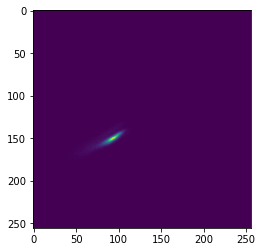

In [72]:
plt.imshow(hist)
plt.show()

In [84]:
src = cv2.imread('./Ch_5_filtering/fig/blue_eyes.png')

# kernel_3 = np.ones((3, 3), np.float32)/9.
# kernel_5 = np.ones((5, 5), np.float32)/25.

# cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
# src: 입력영상
# ddepth: 출력영상의 타입 (cv2.CV_8U, cv2.CV_32F, cv2.CV_64F), 
#     -1 => 입력영상과 같은 타입
# kernel: filter 행렬, 실수형
# anchor: (-1, -1)  필터의 중앙점
# delta:   더할 값
# borderType: 가장자리 픽셀확장 방식
# dst: 출력영상

# dst_3 = cv2.filter2D(src, -1, kernel_3, -1)
# dst_5 = cv2.filter2D(src, -1, kernel_5, -1)

# blur(src, ksize[, dst[, anchor[, borderType]]]) -> dst
# src: 입력영상
# ksize: mean filter kernel size



# GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
# src: 입력영상
# ksize: mean filter kernel size, (0, 0) 자동으로 결정
# sigmaX:  gaussian x 방향의 sigma
# sigmaY:  gaussian y 방향의 sigma

dst_Gaussian = cv2.GaussianBlur(src, (0, 0), 1)
dst_blur = cv2.blur(src, (7, 7))
# dst_5_blur = cv2.blur(src, (5, 5))
cv2.imshow('src', src)
cv2.imshow('dst_blur', dst_blur)
cv2.imshow('dst_Gaussian', dst_Gaussian)


cv2.waitKey()
# for ksize in (3, 5, 7, 9):
#     dst = cv2.blur(src, (ksize, ksize))
    
#     text = '{} x {}'.format(ksize, ksize)
#     cv2.putText(dst, text, (30, 30), cv2.FONT_HERSHEY_COMPLEX,
#                1, (0, 0, 255), 3, cv2.LINE_AA)
#     cv2.imshow('dst', dst)
#     cv2.waitKey()


# cv2.imshow('dst_3', dst_3)
# cv2.imshow('dst_5', dst_5)
# cv2.imshow('dst_3_blur', dst_3_blur)
# cv2.imshow('dst_5_blur', dst_5_blur)


# cv2.waitKey()
cv2.destroyAllWindows()

In [92]:
src = cv2.imread('./Ch_5_filtering/fig/blue_eyes.png', cv2.IMREAD_GRAYSCALE)
print(src.shape)

salt_pepper_noise1 = np.random.choice((0, 255), src.shape, p = (0.99, 0.01))
salt_pepper_noise2 = np.random.choice((0, 255), src.shape, p = (0.99, 0.01))
src_noise = src + salt_pepper_noise1 - salt_pepper_noise2
src_noise = np.clip(src_noise, 0, 255).astype(np.uint8)
print(src_noise.dtype)

## medianBlur(src, ksize[, dst]) -> dst
# src: 입력영상
# ksize: median filter kernel size
dst = cv2.medianBlur(src_noise, 3)


cv2.imshow('src', src)
cv2.imshow('src_noise', src_noise)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

(553, 840)
uint8


In [8]:
src = cv2.imread('./Ch_5_filtering/fig/blue_eyes.png', 1)
# GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
dst_Gaussian = cv2.GaussianBlur(src, (0, 0), 5.0)

# bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
# src: 입력영상
# d: -1로 설정
# sigmaColor: 색공간의 표준편차
# sigmaSpace: 좌표공간의표준편차
# dst:
# borderType: 가장자리 픽셀확장 방식

dst_bilateral = cv2.bilateralFilter(src, -1, 10, 5.0)

cv2.imshow('src', src)
cv2.imshow('dst_Gaussian', dst_Gaussian)
cv2.imshow('dst_bilateral', dst_bilateral)

cv2.waitKey()
cv2.destroyAllWindows()


In [32]:
src = cv2.imread('./Ch_5_filtering/fig/son.jpg')

time = cv2.TickMeter()
time.start()

src_Gaussianblr = cv2.GaussianBlur(src, (0, 0), 2)
edge = 255 - cv2.Canny(src, 100, 200)
edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

dst = cv2.bitwise_and(src_Gaussianblr, edge)

time.stop()
print(time.getTimeMilli(), 'ms')

# time.reset()

cv2.imshow('src', src)
cv2.imshow('src_Gaussian', src_Gaussianblr)
cv2.imshow('edge', edge)
cv2.imshow('dst', dst)



cv2.waitKey()
cv2.destroyAllWindows()

2.5332000000000003 ms


In [29]:
src = cv2.imread('./Ch_5_filtering/fig/son.jpg', 0)

dx = cv2.Sobel(src, cv2.CV_32F, 1, 0, delta = 128)
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1, delta = 128)
mag = np.clip(cv2.magnitude(dx, dy), 0, 255).astype(np.uint8)
# _, thres = cv2.threshold(mag, 230, 255, cv2.THRESH_BINARY)

cv2.imshow('src', src)
# cv2.imshow('dx', dx)
# cv2.imshow('dy', dy)

cv2.imshow('mag', mag)
# cv2.imshow('thres', thres)

cv2.waitKey()
cv2.destroyAllWindows()

In [54]:
src = cv2.imread('./Ch_6_geometric_trans/fig/puppy.bmp')
# print(src.shape)
M = np.array([[1, 0, 0],
            [0.2, 1, 0]], dtype = np.float32)

# rad = 20*np.pi/180
# M = np.array([[np.cos(rad), np.sin(rad), 0],
#              [-np.sin(rad), np.cos(rad), 0]], dtype = np.float32)

# warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
# M: affine transform matrix (size: 2 x 3)
# h, w = src.shape[:2]
# cp = (w/2, h/2)

# getRotationMatrix2D(center, angle, scale) -> retval
# center: 영상의 center
# angle: 회전각도
# scale: 확대율

# M = cv2.getRotationMatrix2D(cp, -20, 1)

dst = cv2.warpAffine(src, M, (w, (h + int(w*0.2))))

cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

In [47]:
src = cv2.imread('./Ch_6_geometric_trans/fig/rose.jpg')

dst1 = cv2.resize(src, (1920, 1280), interpolation = cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (1920, 1280), interpolation = cv2.INTER_LINEAR)
dst3 = cv2.resize(src, (1920, 1280), interpolation = cv2.INTER_CUBIC)
dst4 = cv2.resize(src, (1920, 1280), interpolation = cv2.INTER_LANCZOS4)


cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)



cv2.waitKey()
cv2.destroyAllWindows()

In [58]:
src = cv2.imread('./Ch_6_geometric_trans/fig/checkerboard.png')

h, w = src.shape[:2]

src_point = np.array([[217, 50], [691, 47], [830, 517], [67, 526]], dtype = np.float32)
dst_point = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], dtype = np.float32)

pers = cv2.getPerspectiveTransform(src_point, dst_point)
# warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
dst = cv2.warpPerspective(src, pers, (w, h))
cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

In [59]:
import sys
import numpy as np
import cv2


src = cv2.imread('./Ch_6_geometric_trans/fig/bamboo.jpg')
#
if src is None:
    print('Image load failed!')
    sys.exit()

h, w = src.shape[:2]

map2, map1 = np.indices((h, w), dtype=np.float32)
print(map2)
map1 = map1 + 10 * np.sin(map2/32)
# map2 = map2 + 10 * np.sin(map1/12)


dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

[[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [597. 597. 597. ... 597. 597. 597.]
 [598. 598. 598. ... 598. 598. 598.]
 [599. 599. 599. ... 599. 599. 599.]]
